In [513]:
%pylab inline

# from pylab import *
import cStringIO
import urllib
import scipy
import scipy.misc
import skimage
import skimage.io
import skimage.data
import skimage.draw
from skimage.filters import threshold_otsu, gaussian_filter
import skimage.transform
# from skimage.filter import threshold_otsu, gaussian_filter
from skimage.morphology import binary_closing, binary_erosion, binary_opening, label, binary_dilation
from skimage.measure import regionprops
from skimage.color import label2rgb, rgb2gray
import skimage.feature
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
# import skimage.filter
# from skimage.filters import

Populating the interactive namespace from numpy and matplotlib


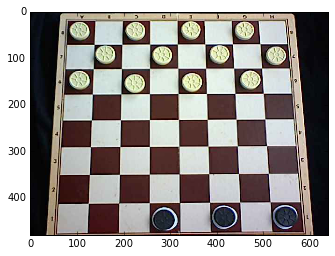

In [514]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
img = skimage.io.imread(URL)
plt.imshow(img)

In [515]:
obr_prev=img

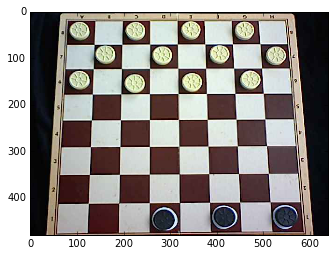

In [516]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
img1 = skimage.io.imread(URL)
plt.imshow(img1)

In [517]:
obr_actual=img1

In [518]:
def najdi_kruznice(obr_prev, prah_kruznice):
    edg = skimage.feature.canny(rgb2gray(obr_prev),3)
    try_radii = np.arange(15, 30)
    res = skimage.transform.hough_circle(edg, try_radii)
#     r, c, try_radii[ridx]
    
#     prah_kruznice = 0.5
    kruznice = np.asarray(np.nonzero(res > prah_kruznice)).T
    nove_kruznice = []
    for kruz in kruznice:
        nova_kruz = [kruz[1], kruz[2], try_radii[kruz[0]]]
        nove_kruznice.append(nova_kruz)
    
    return nove_kruznice

In [519]:
def vymaluj_kruznice(kruznice, img, value=0):
    import copy
    img = copy.copy(img)
    for kruz in kruznice:
        rr,cc = skimage.draw.circle_perimeter(kruz[0], kruz[1], kruz[2])
        img[rr, cc] = value
        rr,cc = skimage.draw.circle_perimeter(kruz[0], kruz[1], kruz[2]+1)
        img[rr, cc] = value
#         print kruz
    return img

[[41, 101, 16],
 [40, 342, 17],
 [41, 456, 17],
 [94, 280, 17],
 [146, 468, 17],
 [147, 101, 17],
 [41, 343, 18],
 [41, 344, 18],
 [41, 346, 18],
 [42, 108, 18],
 [42, 458, 18],
 [42, 460, 18],
 [42, 461, 18],
 [43, 108, 18],
 [43, 109, 18],
 [43, 228, 18],
 [93, 160, 18],
 [93, 164, 18],
 [93, 407, 18],
 [93, 408, 18],
 [94, 164, 18],
 [95, 524, 18],
 [95, 529, 18],
 [147, 469, 18],
 [147, 474, 18],
 [148, 109, 18],
 [148, 474, 18],
 [154, 221, 18],
 [155, 221, 18],
 [40, 344, 19],
 [40, 345, 19],
 [41, 105, 19],
 [41, 345, 19],
 [41, 459, 19],
 [41, 460, 19],
 [42, 227, 19],
 [42, 459, 19],
 [43, 227, 19],
 [92, 407, 19],
 [93, 163, 19],
 [94, 282, 19],
 [95, 284, 19],
 [95, 285, 19],
 [95, 526, 19],
 [95, 527, 19],
 [95, 528, 19],
 [96, 528, 19],
 [147, 470, 19],
 [147, 471, 19],
 [147, 473, 19],
 [148, 108, 19],
 [148, 473, 19],
 [152, 345, 19],
 [152, 346, 19],
 [152, 348, 19],
 [152, 349, 19],
 [154, 222, 19],
 [154, 223, 19],
 [154, 226, 19],
 [155, 226, 19],
 [440, 413, 19],
 [

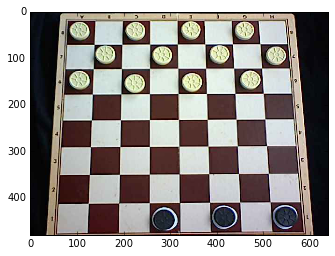

In [520]:
kruznice = najdi_kruznice(obr_prev, 0.4)
imshow(obr_prev)
kruznice

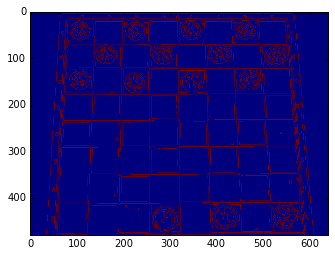

In [521]:
edg = skimage.feature.canny(rgb2gray(obr_prev))
imshow(edg)

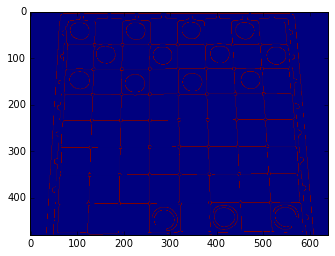

In [522]:
edg = skimage.feature.canny(rgb2gray(obr_prev),3)
imshow(edg)

In [523]:
def vzdalenost(stred1, stred2):
    vzdal = ((stred2[0]-stred1[0])**2+(stred2[1]-stred1[1])**2)**0.5
    return vzdal

In [524]:
def filtrace_kruznic (kruznice):
    kruznice_filtr = []  
    for k in range(len(kruznice)):
        vzdalenosti = []
        for i in range(len(kruznice_filtr)):
            vzdal = vzdalenost(kruznice[k], kruznice_filtr[i])
            vzdalenosti.append(vzdal)

        if len(vzdalenosti) == 0:
            kruznice_filtr.append(kruznice[k])
        else:
            if np.min(vzdalenosti) > 10:
                kruznice_filtr.append(kruznice[k])
    return kruznice_filtr

# print kruznice_filtr

In [525]:
kruznice = filtrace_kruznic(kruznice)
kruznice

[[41, 101, 16],
 [40, 342, 17],
 [41, 456, 17],
 [94, 280, 17],
 [146, 468, 17],
 [147, 101, 17],
 [43, 228, 18],
 [93, 160, 18],
 [93, 407, 18],
 [95, 524, 18],
 [154, 221, 18],
 [152, 345, 19],
 [440, 413, 19],
 [441, 548, 21],
 [447, 286, 21]]

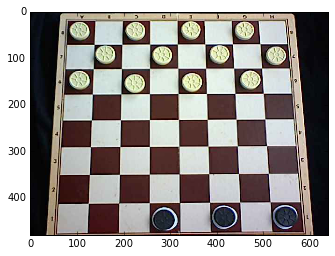

In [526]:
imshow(obr_prev)

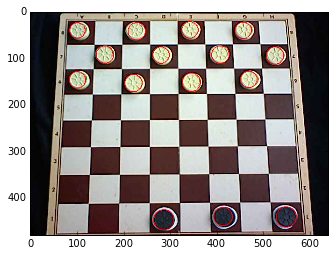

In [527]:
finalimg = vymaluj_kruznice(kruznice, obr_prev,[255,0,0])
imshow(finalimg)

False
[[[ 318.5  233.5]]

 [[ 379.5  233. ]]

 [[ 381.5  290.5]]

 [[ 320.   291.5]]

 [[ 316.5  123.5]]

 [[ 257.   124.5]]

 [[ 376.5  123.5]]

 [[ 378.   177.5]]

 [[ 317.   177.5]]

 [[ 197.   125. ]]

 [[ 255.5  178. ]]

 [[ 195.5  178.5]]

 [[ 255.5  233.5]]

 [[ 134.   178.5]]

 [[ 193.   234.5]]

 [[ 131.   233.5]]

 [[ 256.   291. ]]

 [[ 193.   291.5]]

 [[ 129.5  291.5]]

 [[ 191.5  351. ]]

 [[ 127.5  351.5]]

 [[ 255.   350. ]]

 [[ 255.5  411.5]]

 [[ 190.5  412. ]]

 [[ 125.5  412.5]]

 [[ 319.   350.5]]

 [[ 320.5  411.5]]

 [[ 383.5  349.5]]

 [[ 385.5  410.5]]

 [[ 444.5  289.5]]

 [[ 447.5  349. ]]

 [[ 449.5  410. ]]

 [[ 511.   348.5]]

 [[ 514.   410. ]]

 [[ 507.   289.5]]

 [[ 441.5  232.5]]

 [[ 503.   232. ]]

 [[ 439.5  177.5]]

 [[ 500.   177. ]]

 [[ 436.   123. ]]

 [[ 495.5  123.5]]]


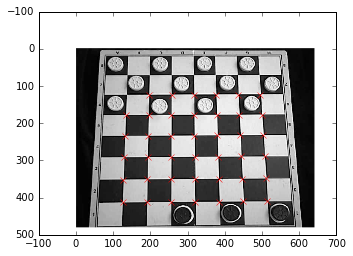

In [548]:
import cv2
import cv
import skimage
import skimage.io
import skimage.color
import numpy as np
import matplotlib.pyplot as plt

imrgb = skimage.io.imread('http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg')
img = skimage.color.rgb2gray(imrgb)
img = (img *254).astype(np.uint8)

ret, corners = cv2.findChessboardCorners(imrgb, (6,7),  flags=cv.CV_CALIB_CB_ADAPTIVE_THRESH)
plt.imshow(img, cmap='gray')
plt.plot(corners[:,:,0], corners[:,:,1], 'rx')
# plt.show()
print ret
print corners

In [537]:
corners